# Using the MovieLens 100K dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np

In [7]:
MOVIES_FILE = 'u.item'
RATINGS_FILE = 'u.data'

In [8]:
import pandas as pd

# Loading datasets
movie_cols = ['movieId' , 'title' , 'release_date' , 'video_release_date' , 'imdb_url' , 'Unknown' , 'Action' , 'Adventure' , 'Animation' , "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,'Thriller' , 'War' , 'Western']
df_movies = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/ML - CS576/RecSys/{MOVIES_FILE}', sep = '|',encoding = 'latin-1',names=movie_cols)
df_ratings = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/ML - CS576/RecSys/{RATINGS_FILE}', sep = '\t',names= ['userId', 'movieId', 'rating', 'timestamp' ])

In [9]:
df_movies.head()

,movieId,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   Unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
df_ratings['rating'].describe()

count    3.383216e+07
mean     3.542540e+00
std      1.063959e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [11]:
# movie popularity by number of ratings - movies with more ratings could be considered "more popular".
df_movies_popularity = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_popularity = df_movies_popularity.sort_values('count', ascending=False)
df_movies_popularity.head()

,count
movieId,
50,583
258,509
100,508
181,507
294,485


Text(0.5, 1.0, 'Movie rating frequency plot')

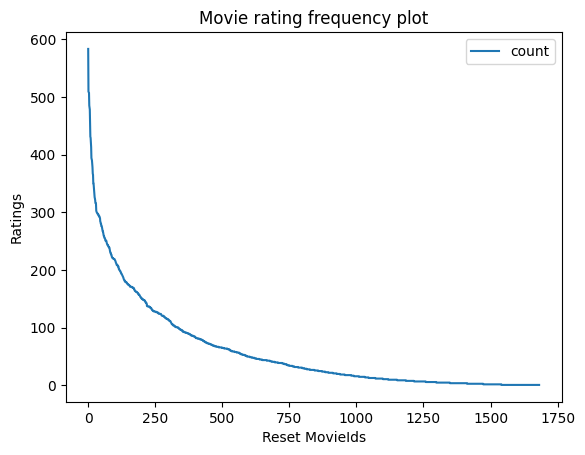

In [12]:
fig = df_movies_popularity.reset_index(drop=True).plot()
fig.set_xlabel('Reset MovieIds')
fig.set_ylabel('Ratings')
fig.set_title('Movie rating frequency plot')

# We clearly see a long-tail distribution. Only some portion of the items are rated frequently.

In [15]:
# Getting percentiles for our movie popularity statistic. Only approximately 5% of the movies have 1146 or more ratings.
df_movies_popularity['count'].quantile(np.arange(1, 0, -0.025))

1.000    583.000
0.975    292.950
0.950    229.850
0.925    191.925
0.900    169.000
0.875    147.000
0.850    127.850
0.825    115.000
0.800    100.000
0.775     89.000
0.750     80.000
0.725     70.000
0.700     65.000
0.675     58.000
0.650     51.650
0.625     46.000
0.600     43.000
0.575     39.000
0.550     34.000
0.525     30.000
0.500     27.000
0.475     24.000
0.450     21.000
0.425     18.000
0.400     16.000
0.375     13.000
0.350     12.000
0.325     10.000
0.300      9.000
0.275      7.000
0.250      6.000
0.225      5.000
0.200      5.000
0.175      4.000
0.150      3.000
0.125      3.000
0.100      2.000
0.075      1.000
0.050      1.000
0.025      1.000
Name: count, dtype: float64

In [16]:
df_ratings_ct = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_ct = df_ratings_ct.sort_values('rating', ascending=False)
df_ratings_ct = df_ratings_ct.reset_index()
df_ratings_ct

,rating,count
0,5,21201
1,4,34174
2,3,27145
3,2,11370
4,1,6110


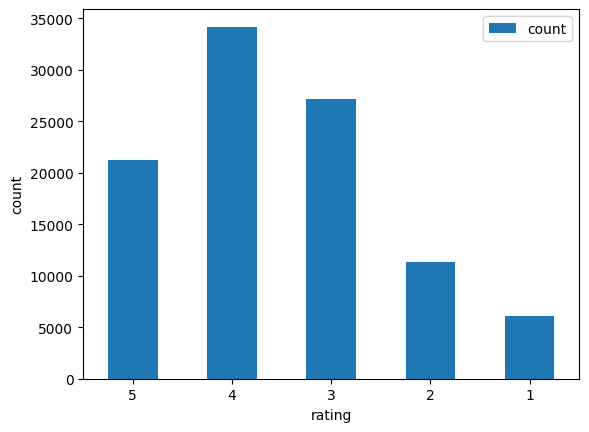

In [17]:
# rating frequency plot.
ax = df_ratings_ct.plot.bar(x='rating', y='count', rot=0, ylabel='count')

In [18]:
# df_raters_freq will contain number of ratings given by every user.
df_raters_freq = pd.DataFrame(df_ratings.groupby('userId').size(), columns=['count'])
df_raters_freq = df_raters_freq.sort_values('count', ascending=False)
df_raters_freq = df_raters_freq.reset_index()
df_raters_freq.head()

,userId,count
0,405,737
1,655,685
2,13,636
3,450,540
4,276,518


In [19]:
# Approximately 50% of the user have given >=31 ratings across all the movies.
df_raters_freq['count'].quantile(np.arange(1, 0.45, -0.05))

1.00    737.0
0.95    310.6
0.90    244.4
0.85    205.4
0.80    171.6
0.75    148.0
0.70    127.4
0.65    108.0
0.60     93.0
0.55     75.0
0.50     65.0
Name: count, dtype: float64